<a href="https://colab.research.google.com/github/ahui-ops/road_to_pytorch2/blob/main/Overview_of_TENSORS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data manipulation

In [3]:
import torch
!pip list

Package                   Version
------------------------- -----------
anyio                     4.12.1
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.4.0
asttokens                 3.0.1
async-lru                 2.1.0
attrs                     25.4.0
babel                     2.17.0
beautifulsoup4            4.14.3
bleach                    6.3.0
certifi                   2025.10.5
cffi                      2.0.0
charset-normalizer        3.4.4
colorama                  0.4.6
comm                      0.2.3
contourpy                 1.3.2
cycler                    0.12.1
d2l                       1.0.3
debugpy                   1.8.19
decorator                 5.2.1
defusedxml                0.7.1
executing                 2.2.1
fastjsonschema            2.21.2
filelock                  3.20.0
fonttools                 4.61.1
fqdn                      1.5.1
fsspec                    2025.9.0
h11                       0.16.0
h5py         

# 1. Overview of Tensors

In [4]:
import torch
import numpy as np

# Lists
my_list = [[1,2,3],[3,2,4]]
my_list

[[1, 2, 3], [3, 2, 4]]

In [5]:
# Numpy arrays
np1 = np.random.rand(3,4) # generate a 3-col, 4-row matrix
np1

#np1.dtype # chk its variable type

array([[0.25960648, 0.28963687, 0.44736525, 0.40733592],
       [0.27403265, 0.39454768, 0.66596425, 0.04973617],
       [0.70312576, 0.40996192, 0.20139199, 0.95634863]])

In [6]:
# Tensors
tensor_2d = torch.randn(3,4)
tensor_2d.dtype

torch.float32

In [7]:
tensor_3d = torch.zeros(2,3,4)
tensor_3d

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

### a) Reshape & slice

In [8]:
import torch
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
# Reshape & View
my_torch = my_torch.reshape(2,5)
my_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [10]:
# Reshape if we not sure the number of items using -1
my_torch2 = torch.arange(15)
my_torch2 = my_torch2.reshape(-1,3) # even when the data in storage is not contiguous, it still works
my_torch2

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]])

In [11]:
my_torch3 = torch.arange(10)
my_torch4 = my_torch3.reshape(2,5)
my_torch3[1] = 5783
my_torch4

tensor([[   0, 5783,    2,    3,    4],
        [   5,    6,    7,    8,    9]])

In [12]:
# Slices
my_torch5 = torch.arange(10)
my_torch5[7]


tensor(7)

In [13]:
my_torch5 = my_torch5.reshape(5,-1)
my_torch5

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [14]:
my_torch5[:,0]

tensor([0, 2, 4, 6, 8])

In [15]:
# Return column
my_torch5[:,1:]

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

In [16]:
# Addition (frm Aston Zhang's Dive into Deep Learning)
X = my_torch5.reshape(5,-1)
Y = my_torch4.reshape(5,-1)
X,Y,X[-1],X[1:3] # -1: last index of tensor

(tensor([[0, 1],
         [2, 3],
         [4, 5],
         [6, 7],
         [8, 9]]),
 tensor([[   0, 5783],
         [   2,    3],
         [   4,    5],
         [   6,    7],
         [   8,    9]]),
 tensor([8, 9]),
 tensor([[2, 3],
         [4, 5]]))

In [17]:
before  = id(Y)
Y = Y + X # The addr of the new Y and the old Y is different, so it will return false
print(id(Y) == before)
print(id(Y) < before)

False
False


In [18]:
Z = torch.zeros_like(Y)
before  = id(Z)
print('id(Z):', id(Z))
Z[:] = X + Y # using a [:] will update the parameter locally
print('id(Z):', id(Z))
print(Z)

id(Z) == before

id(Z): 1910265650864
id(Z): 1910265650864
tensor([[   0, 5785],
        [   6,    9],
        [  12,   15],
        [  18,   21],
        [  24,   27]])


True

In [19]:
# change to other python object
A = X.numpy()
B = torch.tensor(A)
print(type(A), type(B))

a = torch.tensor([3.5])
print(a, a.item(), float(a), int(a))



<class 'numpy.ndarray'> <class 'torch.Tensor'>
tensor([3.5000]) 3.5 3.5 3


### b) Tensor Math operation

In [20]:
import torch
import numpy as np

tensorA = torch.tensor([1,2,3])
tensorB = torch.tensor([4,5,6])

# addition
tensorA + tensorB

# addition longhand 1
torch.add(tensorA,tensorB)

# addition longhand 2
tensorA.add(tensorB)

# local operation 1
tensorA = torch.add(tensorA,tensorB)

# local operation 2
tensorA.add_(tensorB)


tensor([ 9, 12, 15])

In [21]:
# subtraction
tensorB - tensorA

# subtraction longhand
torch.sub(tensorA,tensorB)

tensor([5, 7, 9])

In [22]:
# multiplication
torch.mul(tensorA,tensorB)

tensor([36, 60, 90])

In [23]:
# division
torch.div(tensorA,tensorB)

tensor([2.2500, 2.4000, 2.5000])

In [24]:
# modulus
torch.remainder(tensorB,tensorA)

tensor([4, 5, 6])

In [25]:
# exponent
torch.pow(tensorA,tensorB)

tensor([    6561,   248832, 11390625])

# 2. Data Preprocessing

In [26]:
# Read the dataset
import os
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n') # row name
    f.write('NA,Pave,127500\n') # each column represent a data sample
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [27]:
#!pip install pandas
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [28]:
# while handling NaN, we can either use 'interpolation'(insert data) or 'deletion'
inputs, outputs = data.iloc[:,0:2], data.iloc[:,2]
inputs = inputs.fillna(inputs.mean(numeric_only=True)) # fill in NA with ...
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [29]:
# One-hot encoding
inputs = pd.get_dummies(inputs, dummy_na=True) # if the specific column has a NaN, dummy_na = True
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0        True      False
1       2.0       False       True
2       4.0       False       True
3       3.0       False       True


In [30]:
print(inputs.dtypes)

NumRooms      float64
Alley_Pave       bool
Alley_nan        bool
dtype: object


In [31]:
# Converting into tensor format
import torch
# Convert .values(object type) to float64 to float32(run faster in gpu)
X = torch.tensor(inputs.astype(float).values, dtype=torch.float32)
y = torch.tensor(outputs.astype(float).values, dtype=torch.float32)
X,y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]]),
 tensor([127500., 106000., 178100., 140000.]))

# 3. Linear Algebra

In [32]:
import torch
x = torch.tensor(3.0)
y = torch.tensor(2.0)
print(x+y, x*y, x/y, x**y)

x = torch.arange(4)
print(x, x[3], len(x), x.shape)

# Matrix
A = torch.arange(25).reshape(5,-1)
print(A, '\n',A.T, '\n', (A == A.T))

tensor(5.) tensor(6.) tensor(1.5000) tensor(9.)
tensor([0, 1, 2, 3]) tensor(3) 4 torch.Size([4])
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]]) 
 tensor([[ 0,  5, 10, 15, 20],
        [ 1,  6, 11, 16, 21],
        [ 2,  7, 12, 17, 22],
        [ 3,  8, 13, 18, 23],
        [ 4,  9, 14, 19, 24]]) 
 tensor([[ True, False, False, False, False],
        [False,  True, False, False, False],
        [False, False,  True, False, False],
        [False, False, False,  True, False],
        [False, False, False, False,  True]])


In [33]:
# Tensor
A = torch.arange(20, dtype = torch.float32).reshape(5,-1)
B = A.clone()
print(A, '\n', A+B, '\n', A*B)

a = 2
print(a+A, '\n', (a*X).shape)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]]) 
 tensor([[ 0.,  2.,  4.,  6.],
        [ 8., 10., 12., 14.],
        [16., 18., 20., 22.],
        [24., 26., 28., 30.],
        [32., 34., 36., 38.]]) 
 tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])
tensor([[ 2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9.],
        [10., 11., 12., 13.],
        [14., 15., 16., 17.],
        [18., 19., 20., 21.]]) 
 torch.Size([4, 3])


In [34]:
# Reduction (sum, average, .etc)
x = torch.arange(4,dtype = torch.float32)
print(x,x.sum(),x.shape)

A_sum_axis0 = A.sum(axis=0) # reduce to 1 column
print(A, A_sum_axis0, A_sum_axis0.shape)

A_sum_axis1 = A.sum(axis=1) # reduce to 1 row
print(A_sum_axis1, A_sum_axis1.shape)

sum_A = A.sum(axis=1, keepdims=True)
print(sum_A)

print(A/sum_A) # A is 5*4, sum_A is 5*1, so there's broadcasting involving
# the first column will /sum_A[0], second will /sum_A[1] ...

print(A.cumsum(axis=0)) #cumulative sum column by column
print(A.cumsum(axis=1)) #cumulative sum row by row

tensor([0., 1., 2., 3.]) tensor(6.) torch.Size([4])
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]]) tensor([40., 45., 50., 55.]) torch.Size([4])
tensor([ 6., 22., 38., 54., 70.]) torch.Size([5])
tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])
tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])
tensor([[ 0.,  1.,  3.,  6.],
        [ 4.,  9., 15., 22.],
        [ 8., 17., 27., 38.],
        [12., 25., 39., 54.],
        [16., 33., 51., 70.]])


In [35]:
# dot product
y = torch.ones(4,dtype = torch.float32)
print(x,y,torch.dot(x,y))
print(torch.sum(x*y))


tensor([0., 1., 2., 3.]) tensor([1., 1., 1., 1.]) tensor(6.)
tensor(6.)


In [36]:
# matrix-vector product (y=Ax： A matrix, x vector)
print(A,x,A.shape,'\n', x.shape, torch.mv(A,x))

# matrix-matrix product
B = torch.ones(4,3)
print(A, '\n',B, '\n',torch.mm(A,B))

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]]) tensor([0., 1., 2., 3.]) torch.Size([5, 4]) 
 torch.Size([4]) tensor([ 14.,  38.,  62.,  86., 110.])
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]]) 
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 
 tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])


In [37]:
# Norm 
# In Deep Learning, a Norm measures the "magnitude" of tensors to:
# Calculate Loss: Measuring how far predictions are from targets ($L_1$ or $L_2$ distance).
# Prevent Overfitting: Penalizing large weights to keep the model simple (L2 Regularization makes weights small; L1 makes them zero).
# Stop Explosions: Gradient Clipping uses the $L_2$ norm to shrink massive gradients so the model doesn't crash ($NaN$).
# Stabilize Training: Normalization (like Batch Norm) scales data using norms to speed up learning.

u = torch.tensor([3.0,-4.0])
print(torch.norm(u)) # L_2 = sqrt(Σ x^2)

print(torch.abs(u).sum()) # L_1 = Σ abs(x)

print(torch.norm(torch.ones(4,9))) # Frobenius norm L_F = sqrt(ΣΣ x^2)

tensor(5.)
tensor(7.)
tensor(6.)


# 4. Calculus

In [38]:
# let f(x) = 3x^2 - 4x
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline

def f(x):
    return 3*x**2 - 4*x

def numerical_lim(f,x,h):
    return (f(x+h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit = {numerical_lim(f,1,h):.5f}')
    h*=0.1

h=0.10000, numerical limit = 2.30000
h=0.01000, numerical limit = 2.03000
h=0.00100, numerical limit = 2.00300
h=0.00010, numerical limit = 2.00030
h=0.00001, numerical limit = 2.00003


In [41]:
# %pip install d2l --no-deps

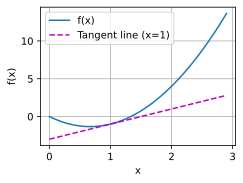

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  # 补上这行，解决 NameError
from matplotlib_inline import backend_inline
from d2l import torch as d2l

# 定义原函数
def f(x):
    return 3 * x**2 - 4 * x

# @save
def use_svg_display():
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

# @save
def set_figsize(figsize=(3.5, 2.5)):
    """设置matplotlib的图表大小"""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

# @save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

# @save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else plt.gca() # 现在 plt 已经定义好了

    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    
    if len(X) != len(Y):
        X = X * len(Y)
    
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
            
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

# 绘图逻辑
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

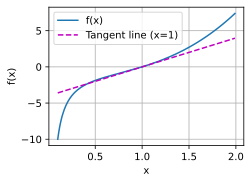

In [44]:
# Exercises 1: graph y = x^3 - 1/x, and the tangent line at x = 1
import numpy as np
from d2l import torch as d2l

def f(x):
    return x**3 - 1/x

x = np.arange(0.1, 2.0, 0.01)  # avoid x=0
d2l.plot(x, [f(x), 4 * x - 4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [48]:
# Exercises 2: find grad of f(x) = 3x^2 + 5e^y
import torch

x = torch.tensor([1.,3.], requires_grad = True)
y = 3* x[0]**2 + 5*torch.exp(x[1])
y.backward() # mandatory if you need to know its grad

print(f"At x={x.tolist()} , gradient = {x.grad}")

At x=[1.0, 3.0] , gradient = tensor([  6.0000, 100.4277])


In [51]:
# Exercises 3: find the gradient of the function ||x||_2
# f = sqrt(Σ x^2)
# f_x = 2x / (2* sqrt(Σ x^2)) = x / sqrt(Σ x^2) = grad

import torch
x = torch.tensor([1.,3.], requires_grad = True)
y = torch.norm(x) # L_2 = sqrt(Σ x^2)
y.backward()

print(f"At x={x.tolist()} , gradient = {x.grad}")

At x=[1.0, 3.0] , gradient = tensor([0.3162, 0.9487])


In [52]:
# Exercise 4: u = f(x, y, z), where x, y, z are all functions of variables a and b, write out the chain rule.
# x = a+b, y = a-b, z = a*b
# u = x^2 + y^2 + z^2
a = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(2.0, requires_grad=True)

x = a + b
y = a - b
z = a * b
u = x**2 + y**2 + z**2
u.backward()

print(f"du/da = {a.grad}")
print(f"du/db = {b.grad}")

du/da = 12.0
du/db = 12.0


# 4.1 Auto differentiation

In [60]:
# y = (x^T)(x)
import torch
x = torch.arange(4.0)
x.requires_grad_(True)
print(x, x.grad)

y = 2*torch.dot(x,x)
print(y)

y.backward()
print(x.grad)

print(x.grad == 4*x)

tensor([0., 1., 2., 3.], requires_grad=True) None
tensor(28., grad_fn=<MulBackward0>)
tensor([ 0.,  4.,  8., 12.])
tensor([True, True, True, True])


In [62]:
x.grad.zero_() # clear the grad
y = x.sum()
y.backward() # only can used for scalar
print(x.grad)

tensor([1., 1., 1., 1.])


In [67]:
# separate calculations
# Integrated (Non-separated): The computer sees z = x^3, so the derivative is 3x^2.
# Separated: The computer sees z = constant * x, so the derivative is "constant".

x.grad.zero_()
y = x * x
u = y.detach() # see y as 'constant' now
z = u*x

z.sum().backward()
print(x.grad, x.grad == u)

x.grad.zero_()
y.sum().backward()
print(x.grad == 2*x)

tensor([0., 1., 4., 9.]) tensor([True, True, True, True])
tensor([True, True, True, True])


# 5. Probability

tensor([0., 0., 0., 0., 1., 0.])
tensor([160., 159., 161., 174., 178., 168.])


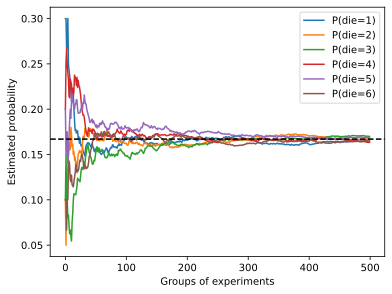

In [78]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

fair_probs = torch.ones([6]) / 6
print(multinomial.Multinomial(1, fair_probs).sample())
print(multinomial.Multinomial(1000, fair_probs).sample())


counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000 # 相对频率作为估计值
counts = multinomial.Multinomial(10, fair_probs).sample((500,)) # repeat 500 times
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
        label=("P(die=" + str(i + 1) + ")"))

d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();